# Lichess Chess Games Analysis

This is an analysis of a dataset of chess games on lichess.org. The dataset was found <a href="https://www.kaggle.com/datasnaek/chess/metadata">here</a>. This was a first attempt at some analysis after the Pandas course on Kaggle.com.

Library and Dataset Imports

In [12]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

chess_games = pd.read_csv("./games.csv")

print("Setup Complete")

Setup Complete


Dataset Sample

In [13]:
chess_games.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


Game Elo Distribution (white)

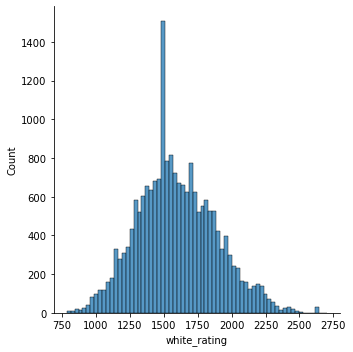

In [14]:
sns.displot(chess_games.white_rating)

Elo Interval vs. White Winrate

<AxesSubplot:title={'center':'White Elo-Interval vs. Winrate'}, xlabel='interval'>

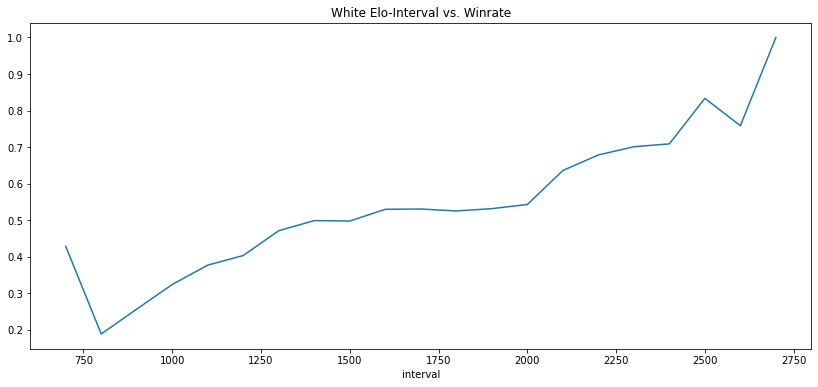

In [19]:
# sorting the dataframe based on white rating
chess_games_rating = chess_games.sort_values(by="white_rating")

# new column for the elo interval
chess_games_rating["interval"] = 0
# new series for if white won
chess_games_rating["white_win"] = True

# assigns the interval feature to the floor of the closest 100
def assignInterval(r):
    r.interval = (r.white_rating // 100) * 100
    return r

# checks if white won the game
def white_win(r):
    if r.winner == 'white':
        r.white_win = True
    else:
        r.white_win = False
    return r


# using the function on each row
chess_games_rating = chess_games_rating.apply(assignInterval, axis=1)
chess_games_rating = chess_games_rating.apply(white_win, axis=1)

# grouping the dataframe by interval then finding the winrate
chess_games_rating = chess_games_rating.groupby(by="interval").apply(lambda df: df.white_win.sum()/len(df.white_win))


plt.figure(figsize=(14,6))

# Add title
plt.title("White Elo-Interval vs. Winrate")
sns.lineplot(data=chess_games_rating,sizes=10000)

Most Common Openings

In [16]:
common_openings = chess_games.groupby(by="opening_name").apply(lambda df:len(df.opening_name))
common_openings.sort_values(ascending=False)

opening_name
Van't Kruijs Opening                                                                  368
Sicilian Defense                                                                      358
Sicilian Defense: Bowdler Attack                                                      296
Scotch Game                                                                           271
French Defense: Knight Variation                                                      271
                                                                                     ... 
Queen's Gambit Accepted: Bogoljubov Defense                                             1
Queen's Gambit Accepted: Central Variation |  Rubinstein Defense                        1
Queen's Gambit Accepted: Central Variation |  Rubinstein Defense |  Yefimov Gambit      1
Queen's Gambit Accepted: Deferred Variation                                             1
Zukertort Opening: Wade Defense                                                        